In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
import keras.layers as L

D:\Anaconda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
# Importing dataset and visualising it
WorkDir = 'PetImages'

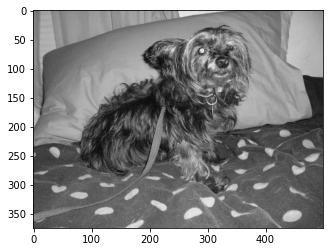

In [3]:
Categories = ['Dog','Cat']
for category in Categories:
    path = os.path.join(WorkDir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [4]:
# Image shape
IMG_SIZE = 80

In [5]:

# Training data
training_data = []
def Training_data():
    for category in Categories:
        path = os.path.join(WorkDir, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:    
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])
            except Exception:
                pass
Training_data()

In [6]:
# Shuffle the dataset
from random import shuffle
shuffle(training_data)

In [7]:
for samp in training_data[:10]:
    print(samp[1])

1
0
0
1
0
1
1
0
0
1


In [8]:
# Splitting data in Training data and labels
X = []
y = []
for data, label in training_data:
    X.append(data)
    y.append(label)

In [ ]:
# To save our current variables 
#import pickle
#k = open("X.pickle", "wb")
#pickle.dump(X , k)
#k.close()

#k = open("y.pickle", "wb")
#pickle.dump(y , k)
#k.close()

In [ ]:
# Opening saved data
#k = open("y.pickle", "wb")
#X = pickle.load(k)

In [9]:
# Normalize input
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X/255

In [10]:
# CNN model architecture
from keras.layers.advanced_activations import LeakyReLU
model = keras.models.Sequential()
model.add(L.Conv2D(filters = 16, kernel_size = (3,3), input_shape = X.shape[1:]))
model.add(LeakyReLU(0.1))
model.add(L.MaxPooling2D())
model.add(L.Dropout(0.25))
model.add(L.Conv2D(filters = 32, kernel_size = (3,3)))
model.add(LeakyReLU(0.1))
model.add(L.MaxPooling2D())
model.add(L.Dropout(0.25))
model.add(L.Conv2D(filters = 64, kernel_size = (3,3)))
model.add(LeakyReLU(0.1))
model.add(L.MaxPooling2D())
model.add(L.Dropout(0.25))
model.add(L.Conv2D(filters = 128, kernel_size = (3,3)))
model.add(LeakyReLU(0.1))
model.add(L.MaxPooling2D())
model.add(L.Dropout(0.25))
model.add(L.Flatten())
model.add(L.Dense(256))
model.add(LeakyReLU(0.1))
model.add(L.Dropout(0.5))
model.add(L.Dense(1))
model.add(L.Activation('sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 78, 16)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 78, 78, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 37, 37, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)      

In [11]:
# Compiling Model
model.compile("adam", 'binary_crossentropy', ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# Fitting data
model.fit(X, y, batch_size = 32, epochs = 25, verbose = 1, validation_split = 0.1)


Train on 22451 samples, validate on 2495 samples
Epoch 1/25
22451/22451 [==============================] - 199s 9ms/step - loss: 0.6651 - accuracy: 0.5832 - val_loss: 0.6049 - val_accuracy: 0.6882
Epoch 2/25
22451/22451 [==============================] - 91s 4ms/step - loss: 0.5523 - accuracy: 0.7189 - val_loss: 0.5046 - val_accuracy: 0.7599
Epoch 3/25
22451/22451 [==============================] - 73s 3ms/step - loss: 0.4745 - accuracy: 0.7759 - val_loss: 0.4306 - val_accuracy: 0.7956
Epoch 4/25
22451/22451 [==============================] - 76s 3ms/step - loss: 0.4222 - accuracy: 0.8060 - val_loss: 0.3949 - val_accuracy: 0.8208
Epoch 5/25
22451/22451 [==============================] - 85s 4ms/step - loss: 0.3773 - accuracy: 0.8289 - val_loss: 0.3789 - val_accuracy: 0.8261
Epoch 6/25
22451/22451 [==============================] - 80s 4ms/step - loss: 0.3473 - accuracy: 0.8471 - val_loss: 0.3714 - val_accuracy: 0.8257
Epoch 7/25
22451/22451 [==============================] - 77s 3ms/s

In [13]:
# Saving the model
model.save('D&C-CNN.model')

In [14]:
# Load the model
model = keras.models.load_model('D&C-CNN.model')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 78, 16)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 78, 78, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 37, 37, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)       

In [15]:
# Preprocessing data
def prep_data(path):
    IMG_SIZE = 80
    new_img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(new_img_array, (IMG_SIZE, IMG_SIZE))
    new_img = new_img_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return new_img, new_img_array
Categories = ['Dog','Cat']

Dog


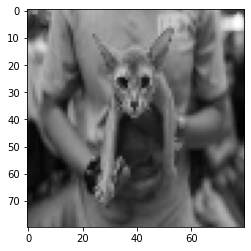

In [16]:
# Predictions
y_pred = model.predict([prep_data('TestImage\Cat-1.jpg')[0]])
print(Categories[int(y_pred[0][0])])
plt.imshow(prep_data('TestImage\Cat-1.jpg')[1], cmap = 'gray')
plt.show()

Dog


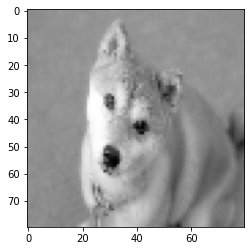

In [17]:
y_pred = model.predict([prep_data('TestImage\Dog-1.jpg')[0]])
print(Categories[int(y_pred[0][0])])
plt.imshow(prep_data('TestImage\Dog-1.jpg')[1], cmap = 'gray')
plt.show()  

Dog


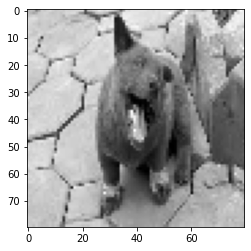

In [18]:
y_pred = model.predict([prep_data('TestImage\Dog-2.jpg')[0]])
print(Categories[int(y_pred[0][0])])
plt.imshow(prep_data('TestImage\Dog-2.jpg')[1], cmap = 'gray')
plt.show()

Dog


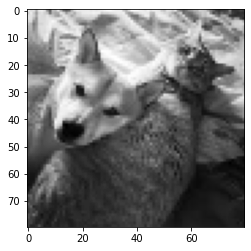

In [19]:
y_pred = model.predict([prep_data('TestImage\Dog-3.jpg')[0]])
print(Categories[int(y_pred[0][0])])
plt.imshow(prep_data('TestImage\Dog-3.jpg')[1], cmap = 'gray')
plt.show()

Cat


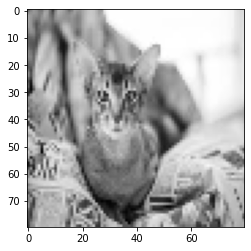

In [20]:
y_pred = model.predict([prep_data('TestImage\Cat-2.jpg')[0]])
print(Categories[int(y_pred[0][0])])
plt.imshow(prep_data('TestImage\Cat-2.jpg')[1], cmap = 'gray')
plt.show()

Cat


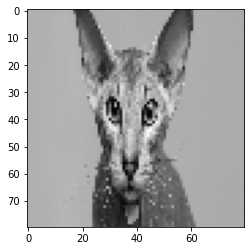

In [21]:
y_pred = model.predict([prep_data('TestImage\Cat-3.jpg')[0]])
print(Categories[int(y_pred[0][0])])
plt.imshow(prep_data('TestImage\Cat-3.jpg')[1], cmap = 'gray')
plt.show()

Cat


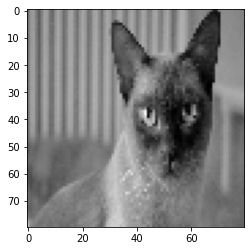

In [22]:
y_pred = model.predict([prep_data('TestImage\Cat-4.jpg')[0]])
print(Categories[int(y_pred[0][0])])
plt.imshow(prep_data('TestImage\Cat-4.jpg')[1], cmap = 'gray')
plt.show()